# Trabajo Pr√°ctico: Modelado Comparativo en Miner√≠a de Datos (Clasificaci√≥n)

En este trabajo vamos a analizar un dataset que contiene informaci√≥n sobre h√°bitos de estudiantes universitarios y su rendimiento acad√©mico. El objetivo de este notebook es aplicar t√©cnicas de miner√≠a de datos para construir un modelo de clasificaci√≥n que permita predecir una variable categ√≥rica a partir del resto de los datos.

## Importaci√≥n de librerias

Antes de empezar, importamos todas las librer√≠as que vamos a necesitar para el an√°lisis, la visualizaci√≥n y el modelado.


In [66]:
# Importamos las librer√≠as

import pandas as pd  # para trabajar con datos en forma de tabla
import numpy as np   # para operaciones num√©ricas

import matplotlib.pyplot as plt  # para hacer gr√°ficos
import seaborn as sns            # para gr√°ficos m√°s completos

from sklearn.preprocessing import StandardScaler, LabelEncoder  # para preparar los datos
from sklearn.model_selection import train_test_split  # para dividir en train y test
from sklearn.decomposition import PCA  # para reducci√≥n de dimensionalidad

# Modelos de clasificaci√≥n
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# M√©tricas para clasificaci√≥n
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Selecci√≥n de variables (opcional seg√∫n an√°lisis)
from sklearn.feature_selection import SelectKBest, chi2

## Carga del dataset

Trabajamos con un archivo llamado `student_habits_performance.csv`, que contiene informaci√≥n sobre h√°bitos de estudiantes y su rendimiento acad√©mico.

In [67]:
# Cargamos el nuevo archivo CSV (delimitado por comas)
df = pd.read_csv('student_habits_performance_2.csv')

# Mostramos las primeras filas
df.head()

student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4


## Resumen general del dataset

En esta secci√≥n presentamos un resumen inicial para entender mejor la estructura y calidad del dataset:

In [68]:
# ========================
# 1. Dimensiones del dataset
# ========================
print("1. Dimensiones del dataset")
print(f"Filas: {df.shape[0]}  |  Columnas: {df.shape[1]}")
print("-" * 50)

# ========================
# 2. Primeras filas del dataset
# ========================
print("2. Primeras filas del dataset")
display(df.head())
print("-" * 50)

# ========================
# 3. Informaci√≥n general del dataset
# ========================
print("3. Informaci√≥n general del dataset")
df.info()
print("-" * 50)



1. Dimensiones del dataset
Filas: 10000  |  Columnas: 16
--------------------------------------------------
2. Primeras filas del dataset


student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

--------------------------------------------------
3. Informaci√≥n general del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     10000 non-null  object 
 1   age                            10000 non-null  int64  
 2   gender                         10000 non-null  object 
 3   study_hours_per_day            10000 non-null  float64
 4   social_media_hours             10000 non-null  float64
 5   netflix_hours                  10000 non-null  float64
 6   part_time_job                  10000 non-null  object 
 7   attendance_percentage          10000 non-null  float64
 8   sleep_hours                    10000 non-null  float64
 9   diet_quality                   10000 non-null  object 
 10  exercise_frequency             10000 non-null  int64  
 11  parental_education_l

In [69]:
# ========================
# 4. Valores nulos por columna
# ========================
print("4. Valores nulos por columna")
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]

if not nulls.empty:
    print("Se encontraron columnas con valores nulos:")
    display(pd.DataFrame(nulls, columns=["Valores nulos"]))
else:
    print("No se encontraron valores nulos.")
print("-" * 50)

# ========================
# 5. Filas duplicadas
# ========================
print("5. Filas duplicadas")
print(f"Cantidad de filas duplicadas: {df.duplicated().sum()}")
print("-" * 50)

# ========================
# 6. Categor√≠as √∫nicas por variable categ√≥rica
# ========================
print("6. Categor√≠as √∫nicas por cada variable categ√≥rica")
for col in df.select_dtypes(include="object").columns:
    print(f"\n {col} ({df[col].nunique()} categor√≠as):")
    print(df[col].value_counts())
    print("-" * 30)

4. Valores nulos por columna
Se encontraron columnas con valores nulos:


Valores nulos
parental_education_level            952

--------------------------------------------------
5. Filas duplicadas
Cantidad de filas duplicadas: 0
--------------------------------------------------
6. Categor√≠as √∫nicas por cada variable categ√≥rica

 student_id (1000 categor√≠as):
student_id
S1725    21
S1775    19
S1072    19
S1890    19
S1038    19
         ..
S1696     3
S1239     3
S1218     3
S1023     2
S1544     2
Name: count, Length: 1000, dtype: int64
------------------------------

 gender (3 categor√≠as):
gender
Male      4908
Female    4660
Other      432
Name: count, dtype: int64
------------------------------

 part_time_job (2 categor√≠as):
part_time_job
No     7832
Yes    2168
Name: count, dtype: int64
------------------------------

 diet_quality (3 categor√≠as):
diet_quality
Fair    4321
Good    3868
Poor    1811
Name: count, dtype: int64
------------------------------

 parental_education_level (3 categor√≠as):
parental_education_level
High School    3929
Bachelor       3463
Master         1656
Name: count, 

A partir del an√°lisis exploratorio realizado, se obtienen las siguientes observaciones clave:

- **Cantidad de datos:** el dataset cuenta con 10,000 registros y 16 columnas, una cantidad adecuada para aplicar t√©cnicas de clasificaci√≥n de forma robusta.

- **Tipos de variables:** se identifican variables num√©ricas (`int64`, `float64`) como `age`, `study_hours_per_day`, `exam_score`, y variables categ√≥ricas (`object`) como `gender`, `diet_quality`, `internet_quality`, entre otras. Esta combinaci√≥n favorece el uso de diferentes tipos de modelos y t√©cnicas de preprocesamiento.

- **Primeras filas:** los datos iniciales presentan valores l√≥gicos y bien distribuidos, sin errores de carga visibles.

- **Valores nulos:** se detectaron 952 valores nulos en la variable `parental_education_level`, representando un 9.5% del total. Este porcentaje es manejable, y se optar√° por imputarlos con una categor√≠a adicional denominada `"No declarado"` para no eliminar datos ni introducir supuestos artificiales.

- **Filas duplicadas:** no se encontraron registros duplicados en el dataset (`0` filas duplicadas), lo que refleja una buena calidad estructural.

- **Formato general:** los nombres de las columnas son claros y coherentes con los datos que representan. No se identifican errores de formato ni estructuras inconsistentes.

- **Categor√≠as √∫nicas:** se revisaron todas las variables categ√≥ricas:
  - `student_id`: contiene 10000 valores √∫nicos (uno por estudiante), por lo tanto, no ser√° √∫til como predictor y ser√° eliminado.
  - Variables como `gender`, `part_time_job`, `diet_quality`, `internet_quality`, etc., tienen un n√∫mero reducido de categor√≠as y est√°n listas para ser codificadas posteriormente.

## Tratamiento Inicial de los Datos (Preprocesamiento B√°sico)

### a) Eliminaci√≥n de columna no informativa: `student_id`

La columna `student_id` contiene identificadores √∫nicos para cada estudiante y no aporta valor predictivo al modelo. Al tratarse de una variable sin relaci√≥n directa con el rendimiento acad√©mico, se procede a eliminarla del dataset.

In [70]:
df.drop(columns=["student_id"], inplace=True)

### b) Imputaci√≥n de valores nulos

Se detectaron valores nulos en la variable `parental_education_level`, que representa el nivel educativo de los padres. Para evitar eliminar registros, se imputan estos valores con una nueva categor√≠a `"No declarado"`, dejando expl√≠cito que dicha informaci√≥n no fue proporcionada.


In [71]:
# Imputar valores nulos en parental_education_level
df["parental_education_level"] = df["parental_education_level"].fillna("No declarado")

### c) Transformaci√≥n de la variable objetivo

Como se trabajar√° con modelos de clasificaci√≥n, se transforma la variable continua `exam_score` en una variable categ√≥rica denominada `exam_performance`, con tres clases:

- **Bajo**: score < 50  
- **Medio**: 50 ‚â§ score < 80  
- **Alto**: score ‚â• 80

Esta nueva variable ser√° la que intentaremos predecir mediante distintos modelos de clasificaci√≥n.

In [75]:
# Crear variable categ√≥rica de clasificaci√≥n: exam_performance
def clasificar_rendimiento(score):
    if score < 50:
        return "Bajo"
    elif score < 80:
        return "Medio"
    else:
        return "Alto"

df["exam_performance"] = df["exam_score"].apply(clasificar_rendimiento)

## Dataset Preprocesado

In [73]:
# ========================
# Revisi√≥n del Dataset Preprocesado
# ========================

# 1. Dimensiones del dataset actualizado
print("1. Dimensiones del dataset (post-tratamiento)")
print(f"Filas: {df.shape[0]}  |  Columnas: {df.shape[1]}")
print("-" * 50)

# 2. Primeras filas
print("2. Primeras filas del dataset actualizado")
display(df.head())
print("-" * 50)

# 3. Informaci√≥n general
print("3. Tipos de datos y no-nulos")
df.info()
print("-" * 50)



1. Dimensiones del dataset (post-tratamiento)
Filas: 10000  |  Columnas: 16
--------------------------------------------------
2. Primeras filas del dataset actualizado


age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
0   23  Female                  0.0                 1.2            1.1   
1   20  Female                  6.9                 2.8            2.3   
2   21    Male                  1.4                 3.1            1.3   
3   23  Female                  1.0                 3.9            1.0   
4   19  Female                  5.0                 4.4            0.5   

  part_time_job  attendance_percentage  sleep_hours diet_quality  \
0            No                   85.0          8.0         Fair   
1            No                   97.3          4.6         Good   
2            No                   94.8          8.0         Poor   
3            No                   71.0          9.2         Poor   
4            No                   90.9          4.9         Fair   

   exercise_frequency parental_education_level internet_quality  \
0                   6                   Master          Average   
1                   6              High School          Average   
2                   1              High School             Poor   
3                   4                   Master             Good   
4                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  \
0                     8                           Yes        56.2   
1                     8                            No       100.0   
2                     1                            No        34.3   
3                     1                           Yes        26.8   
4                     1                            No        66.4   

  exam_performance  
0            Medio  
1             Alto  
2             Bajo  
3             Bajo  
4            Medio

--------------------------------------------------
3. Tipos de datos y no-nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            10000 non-null  int64  
 1   gender                         10000 non-null  object 
 2   study_hours_per_day            10000 non-null  float64
 3   social_media_hours             10000 non-null  float64
 4   netflix_hours                  10000 non-null  float64
 5   part_time_job                  10000 non-null  object 
 6   attendance_percentage          10000 non-null  float64
 7   sleep_hours                    10000 non-null  float64
 8   diet_quality                   10000 non-null  object 
 9   exercise_frequency             10000 non-null  int64  
 10  parental_education_level       10000 non-null  object 
 11  internet_quality           

In [76]:
# 4. Verificar valores nulos
print("4. Valores nulos restantes por columna")
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]
if not nulls.empty:
    print("No Se encontraron columnas con valores nulos:")
    display(pd.DataFrame(nulls, columns=["Valores nulos"]))
else:
    print("No se encontraron valores nulos.")
print("-" * 50)

# 5. Verificar existencia de exam_performance
print("5. Verificaci√≥n de la variable objetivo 'exam_performance'")
print(df["exam_performance"].value_counts())
print("-" * 50)

# 6. Categor√≠as √∫nicas por cada variable categ√≥rica
print("6. Categor√≠as √∫nicas por variable categ√≥rica (actualizado)")
for col in df.select_dtypes(include="object").columns:
    print(f"\n {col} ({df[col].nunique()} categor√≠as):")
    print(df[col].value_counts())
    print("-" * 30)

4. Valores nulos restantes por columna
No se encontraron valores nulos.
--------------------------------------------------
5. Verificaci√≥n de la variable objetivo 'exam_performance'
exam_performance
Medio    5945
Alto     2740
Bajo     1315
Name: count, dtype: int64
--------------------------------------------------
6. Categor√≠as √∫nicas por variable categ√≥rica (actualizado)

 gender (3 categor√≠as):
gender
Male      4908
Female    4660
Other      432
Name: count, dtype: int64
------------------------------

 part_time_job (2 categor√≠as):
part_time_job
No     7832
Yes    2168
Name: count, dtype: int64
------------------------------

 diet_quality (3 categor√≠as):
diet_quality
Fair    4321
Good    3868
Poor    1811
Name: count, dtype: int64
------------------------------

 parental_education_level (4 categor√≠as):
parental_education_level
High School     3929
Bachelor        3463
Master          1656
No declarado     952
Name: count, dtype: int64
------------------------------

 int

### Revisi√≥n del Dataset Preprocesado

Despu√©s de aplicar el preprocesamiento inicial, se realiz√≥ una nueva inspecci√≥n general del dataset con los siguientes resultados:

---

- **Dimensiones del dataset:**  
  El conjunto de datos contiene **10,000 registros** y **16 columnas**, incluyendo la nueva variable objetivo `exam_performance`.

---

- **Tipos de datos y estructura:**  
  El dataset est√° completamente libre de valores nulos. Todas las columnas tienen el tipo de dato apropiado:
  - 6 columnas num√©ricas flotantes (`float64`)
  - 3 columnas num√©ricas enteras (`int64`)
  - 7 columnas categ√≥ricas (`object`)

---

- **Valores nulos restantes:**  
   **No se encontraron valores nulos** en ninguna columna despu√©s del tratamiento.

---

- **Distribuci√≥n de la variable objetivo `exam_performance`:**  
  Esta variable categ√≥rica se cre√≥ a partir de `exam_score` y tiene la siguiente distribuci√≥n:

  - **Medio:** 5945 estudiantes (59.5%)
  - **Alto:** 2740 estudiantes (27.4%)
  - **Bajo:** 1315 estudiantes (13.1%)

  Esta distribuci√≥n es moderadamente desbalanceada pero a√∫n v√°lida para clasificaci√≥n. Se pueden considerar estrategias de balanceo si el rendimiento lo requiere.

---

- **Revisi√≥n de variables categ√≥ricas:**  
  Se analiz√≥ la distribuci√≥n de valores en las variables categ√≥ricas m√°s importantes:

  - **`gender` (3 categor√≠as):**
    - `Male`: 4908 estudiantes
    - `Female`: 4660 estudiantes
    - `Other`: 432 estudiantes  
    > La categor√≠a `"Other"` incluye personas que no se identifican exclusivamente como masculino o femenino. Representa el 4.3% del total.

  - **`part_time_job` (2 categor√≠as):**
    - `No`: 7832 estudiantes (78.3%)
    - `Yes`: 2168 estudiantes (21.7%)  
    > Esta variable puede tener un impacto en el rendimiento acad√©mico, dependiendo de c√≥mo los estudiantes equilibren el trabajo con los estudios.

---

Estas verificaciones confirman que el dataset est√° en condiciones √≥ptimas para continuar con el an√°lisis exploratorio visual y el modelado.

## 1. Descripci√≥n del Problema

En este trabajo abordamos un problema de clasificaci√≥n utilizando un dataset que recopila informaci√≥n sobre estudiantes universitarios, sus h√°bitos, condiciones personales y estilos de vida. El prop√≥sito del an√°lisis es predecir una categor√≠a de rendimiento acad√©mico a partir de esas variables.

---

### Resumen del Dataset

El conjunto de datos contiene 10,000 registros y 16 columnas. Incluye variables num√©ricas (como horas de estudio, sue√±o y asistencia) y categ√≥ricas (como g√©nero, calidad de dieta, tipo de conexi√≥n a internet, entre otras).  
La variable original `exam_score` fue transformada en una variable categ√≥rica llamada `exam_performance`, con tres clases: **Bajo**, **Medio** y **Alto**.

---

### Objetivo del An√°lisis

El objetivo es construir modelos de clasificaci√≥n que permitan predecir el nivel de rendimiento acad√©mico (`exam_performance`) de los estudiantes. Esto implica clasificar a cada estudiante en una de tres categor√≠as en funci√≥n de sus caracter√≠sticas personales y h√°bitos.

---

### Justificaci√≥n del Dataset

Este dataset es adecuado para aplicar t√©cnicas de clasificaci√≥n por los siguientes motivos:

- La variable objetivo ha sido categorizada en tres clases balanceadas de forma razonable.
- Incluye tanto variables num√©ricas como categ√≥ricas, lo que permite evaluar distintos tipos de modelos de clasificaci√≥n.
- No contiene valores nulos ni duplicados tras el preprocesamiento.
- La cantidad de observaciones (10,000 registros) permite construir, entrenar y validar modelos con consistencia.

---

En las secciones siguientes se explorar√°n distintas t√©cnicas de clasificaci√≥n, y se evaluar√° su rendimiento utilizando m√©tricas como accuracy, matriz de confusi√≥n y reporte de clasificaci√≥n.

## 2. An√°lisis Exploratorio de Datos (EDA)

### 2.1 Estad√≠sticas descriptivas generales

Se analiza un resumen estad√≠stico de las variables num√©ricas del dataset, junto con el conteo de categor√≠as presentes en las variables cualitativas.

In [80]:
# Resumen de variables num√©ricas
df.describe().style\
    .set_caption("Estad√≠sticas Descriptivas de Variables Num√©ricas")\
    .background_gradient(cmap='BuGn')\
    .format(precision=2)

Este resumen estad√≠stico permite observar la escala y dispersi√≥n de las variables num√©ricas en el dataset. Podemos ver que las medias, medianas y rangos son razonables, y que no existen valores extremos evidentes que requieran correcci√≥n inmediata.

### 2.2 Distribuci√≥n de la variable objetivo `exam_performance`

La variable objetivo `exam_performance` fue generada a partir de `exam_score` y representa tres niveles de rendimiento: **Bajo**, **Medio** y **Alto**.  
Se analiza su distribuci√≥n para verificar el equilibrio entre clases.

C:\Users\LORENA SIERRA\AppData\Local\Temp\ipykernel_13368\352174069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="exam_performance", palette="BuGn_r")


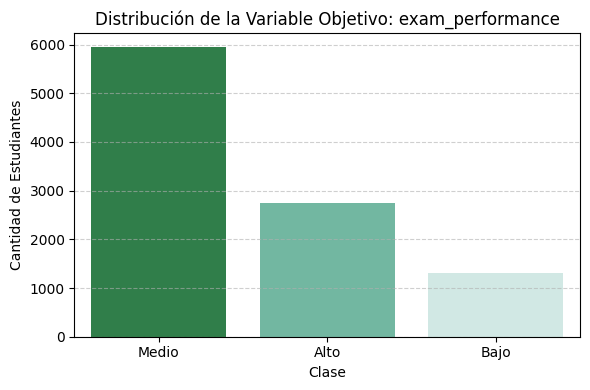

In [79]:
# Conteo de clases
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="exam_performance", palette="BuGn_r")
plt.title("Distribuci√≥n de la Variable Objetivo: exam_performance")
plt.xlabel("Clase")
plt.ylabel("Cantidad de Estudiantes")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Tabla con conteo y porcentaje
target_counts = df["exam_performance"].value_counts()
target_percent = round(df["exam_performance"].value_counts(normalize=True) * 100, 2)

summary_df = pd.DataFrame({
    "Cantidad": target_counts,
    "Porcentaje (%)": target_percent
})

summary_df.style.set_caption(" Distribuci√≥n de Clases en 'exam_performance'")\
    .background_gradient(cmap='BuGn')\
    .format(precision=2)


 **An√°lisis**
 
La distribuci√≥n de clases en la variable exam_performance muestra un predominio de la clase "Medio", seguido por "Alto" y "Bajo". Aunque hay cierto desbalance, especialmente con la clase "Bajo", el dataset sigue siendo utilizable sin necesidad inmediata de t√©cnicas de balanceo.

La tabla confirma visualmente la distribuci√≥n observada en el gr√°fico. Se puede considerar el uso de m√©tricas como f1-score o estrategias como SMOTE si el rendimiento en modelos se ve afectado por este desbalance.

### 2.3 Visualizaci√≥n de distribuciones de variables

Se analizan las distribuciones de las variables predictoras num√©ricas mediante histogramas, con el fin de identificar sesgos, asimetr√≠as y posibles valores at√≠picos. Estas visualizaciones tambi√©n ayudan a comprender c√≥mo est√°n distribuidos los datos que alimentar√°n los modelos de clasificaci√≥n.

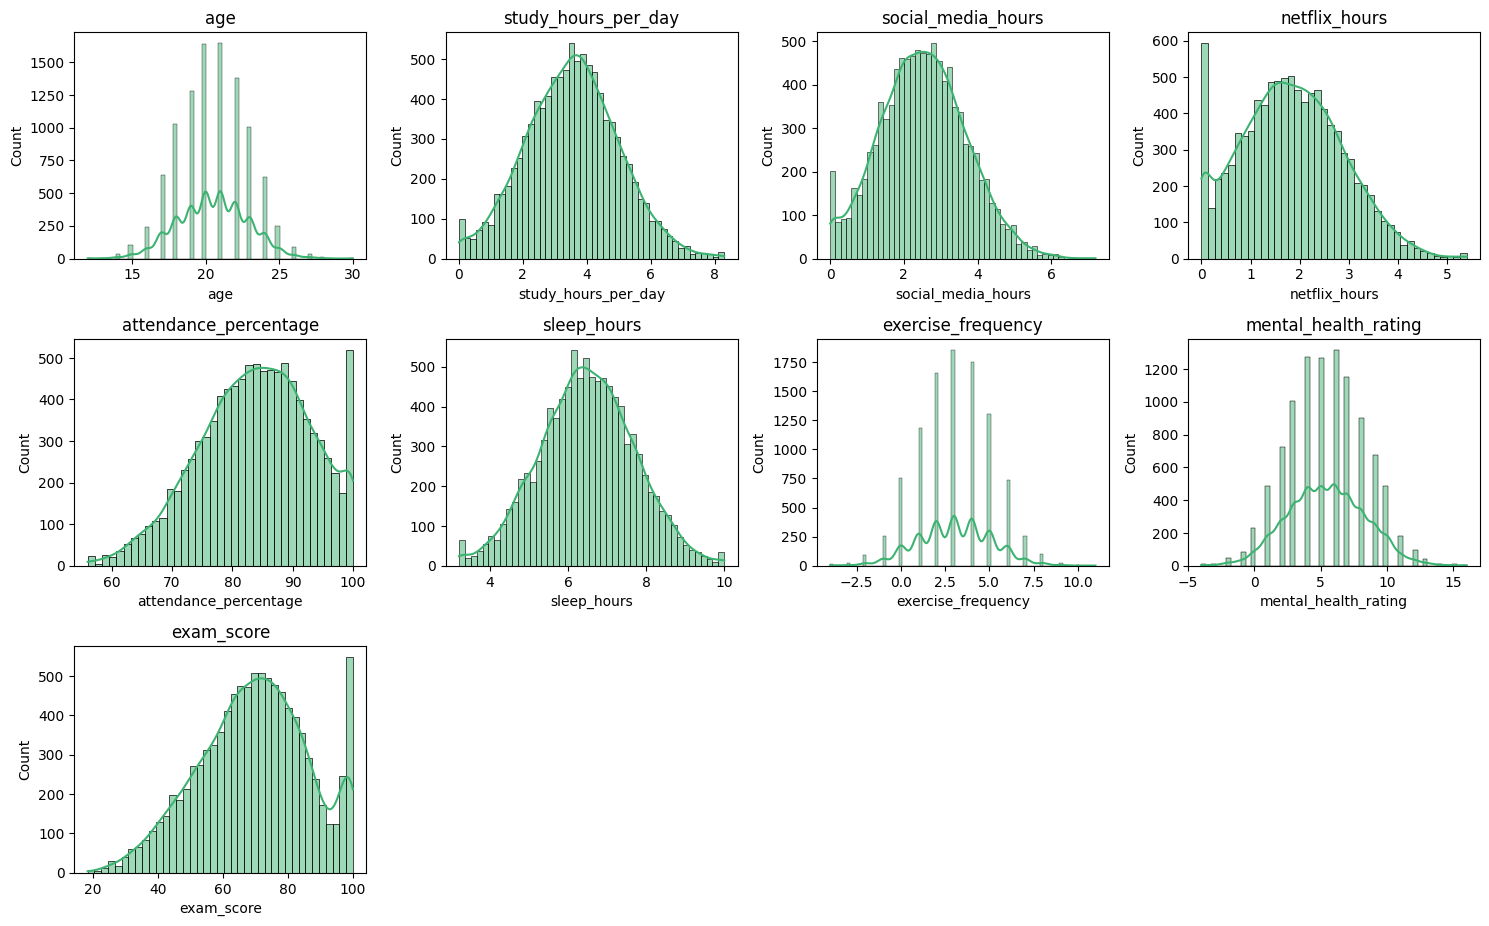

In [81]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Histograma de todas las variables num√©ricas
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=col, kde=True, color="mediumseagreen")
    plt.title(col)
    plt.tight_layout()

 **An√°lisis de distribuciones**  
Se muestran las distribuciones de las variables num√©ricas que ser√°n usadas para predecir `exam_performance`. Se destacan los siguientes aspectos:

- **Variables como `age` y `sleep_hours`** est√°n distribuidas de forma razonablemente sim√©trica, lo que facilita su uso en modelos lineales o √°rboles.
- **Asimetr√≠a**: Variables como `social_media_hours`, `netflix_hours` y `study_hours_per_day` est√°n sesgadas positivamente. Esto podr√≠a afectar a algunos modelos sensibles a la escala y normalidad.
- **`exercise_frequency`** tiene una forma claramente discreta, lo cual ser√° tenido en cuenta en la codificaci√≥n.
- Estas distribuciones permitir√°n comparar si los distintos niveles de rendimiento (`Bajo`, `Medio`, `Alto`) tienen relaciones particulares con los predictores. Esto se complementar√° luego con an√°lisis por clase (boxplots).

El an√°lisis exploratorio confirma que las variables tienen comportamiento diverso y por tanto requieren preprocesamiento cuidadoso para los modelos de clasificaci√≥n.

### 2.4 Detecci√≥n de valores at√≠picos (Clasificaci√≥n)

Se utilizan boxplots para detectar posibles valores at√≠picos en las variables num√©ricas. Estas observaciones extremas pueden afectar el rendimiento de ciertos modelos, especialmente aquellos sensibles a la escala y distribuci√≥n como la regresi√≥n log√≠stica o KNN.

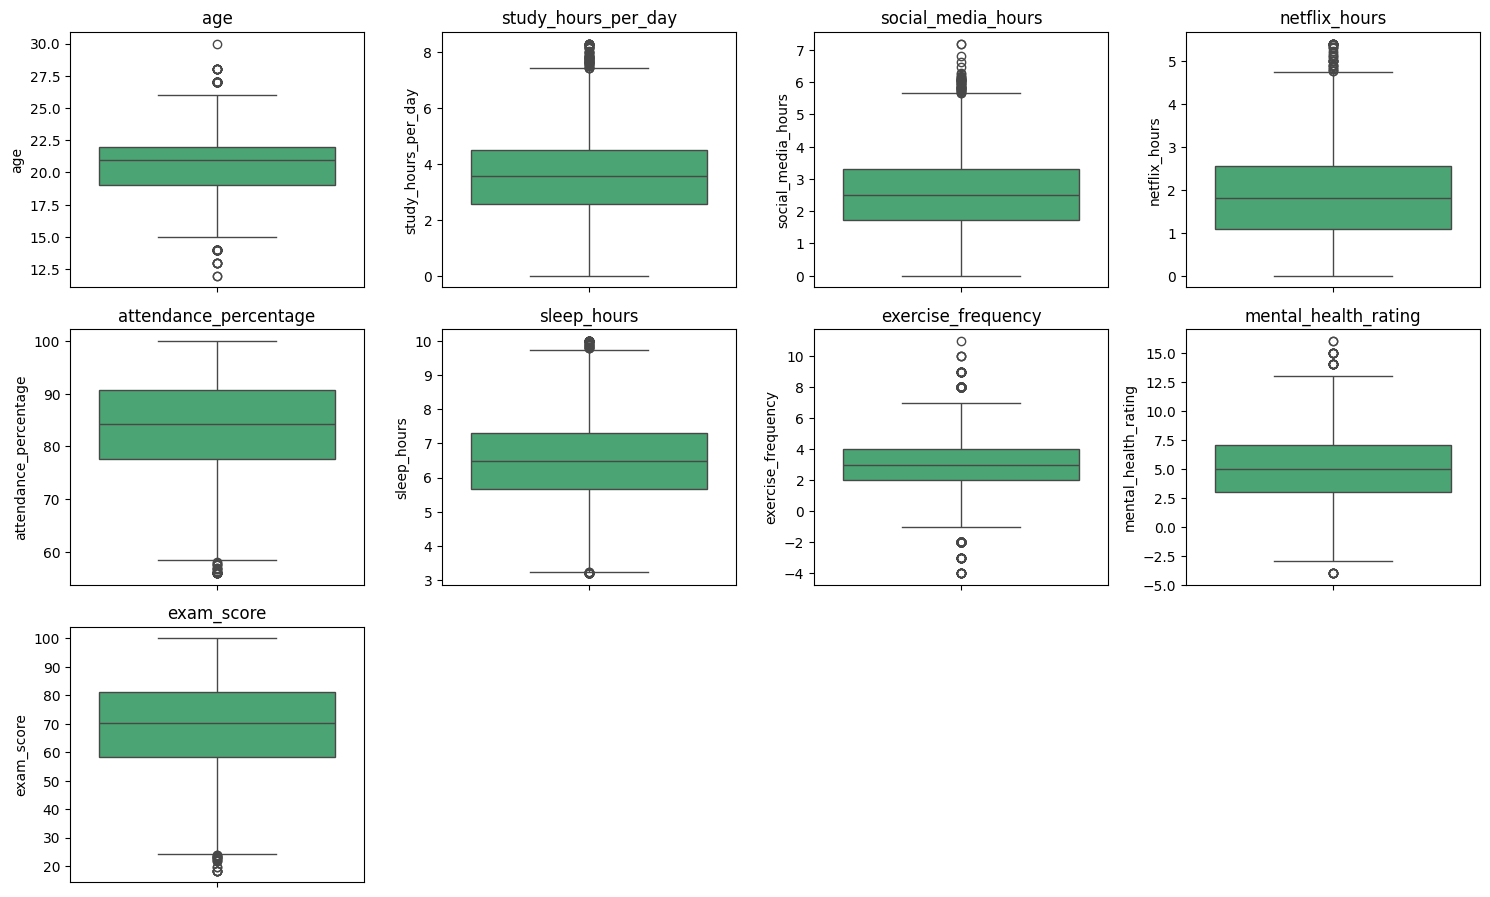

In [82]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=col, color="mediumseagreen")
    plt.title(col)
    plt.tight_layout()

 **An√°lisis**
 
La forma de los boxplots es similar al caso de regresi√≥n, ya que se comparten las mismas variables.

Aqu√≠ nos sirven para detectar valores extremos que podr√≠an desbalancear clases en exam_performance.

Tambi√©n indican posibles puntos de corte √∫tiles para generar nuevas variables categ√≥ricas o binarizaciones (si se desea).

### 2.5 Correlaci√≥n entre variables (Clasificaci√≥n)

Se utiliza una matriz de correlaci√≥n para identificar relaciones entre las variables num√©ricas del dataset. Esto permite detectar redundancias o dependencias que pueden afectar el rendimiento del modelo y ayudan a reducir la dimensionalidad si es necesario.

C:\Users\LORENA SIERRA\AppData\Local\Temp\ipykernel_13368\1146707614.py:6: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\LORENA SIERRA\OneDrive\Desktop\GITHUB\MODELIZADO\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


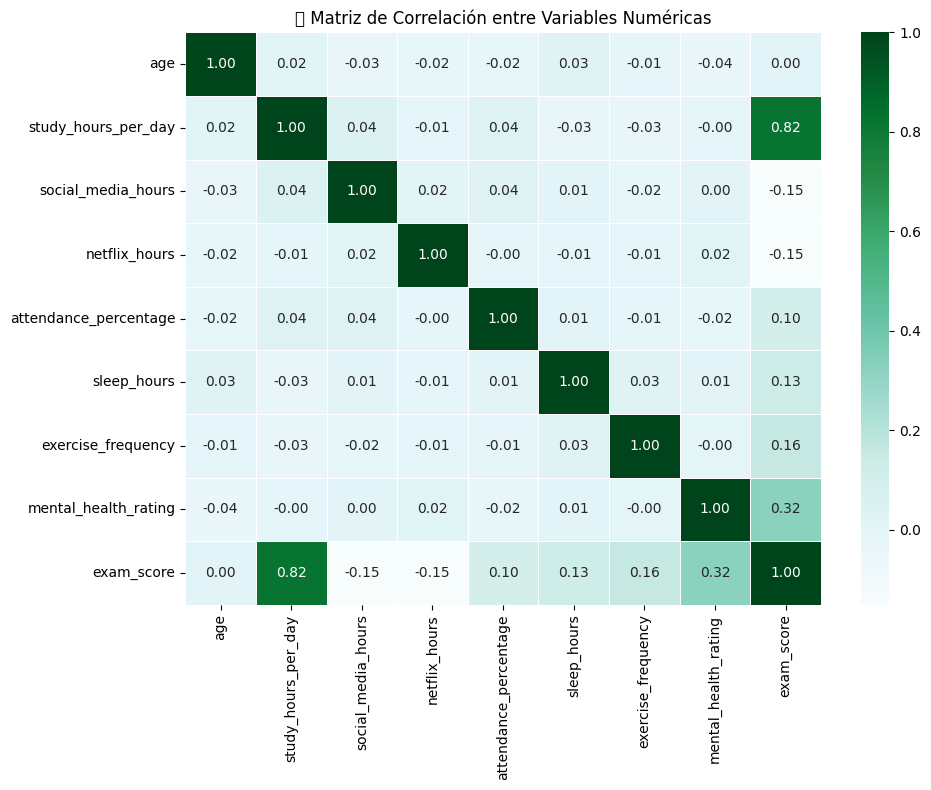

In [83]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=["float64", "int64"]).corr()

sns.heatmap(corr, annot=True, cmap="BuGn", fmt=".2f", linewidths=0.5)
plt.title("üîó Matriz de Correlaci√≥n entre Variables Num√©ricas")
plt.tight_layout()
plt.show()

 **An√°lisis**
 
La correlaci√≥n se interpreta igual que en regresi√≥n, pero aqu√≠ se busca entender qu√© variables tienen m√°s relaci√≥n con la clase.

study_hours_per_day y mental_health_rating tienen asociaci√≥n positiva con el rendimiento acad√©mico.

Este an√°lisis orienta qu√© variables ser√°n m√°s relevantes al codificarlas para modelos como √Årboles, Random Forest o Regresi√≥n Log√≠stica.

### 2.6 ‚Äì Visualizaci√≥n de la Matriz de Dispersi√≥n por Clase (Clasificaci√≥n)
Esta visualizaci√≥n permite observar la relaci√≥n entre variables num√©ricas seg√∫n las clases de la variable objetivo exam_performance. Es √∫til para detectar patrones, agrupaciones o separaciones que podr√≠an ser captadas por modelos de clasificaci√≥n.

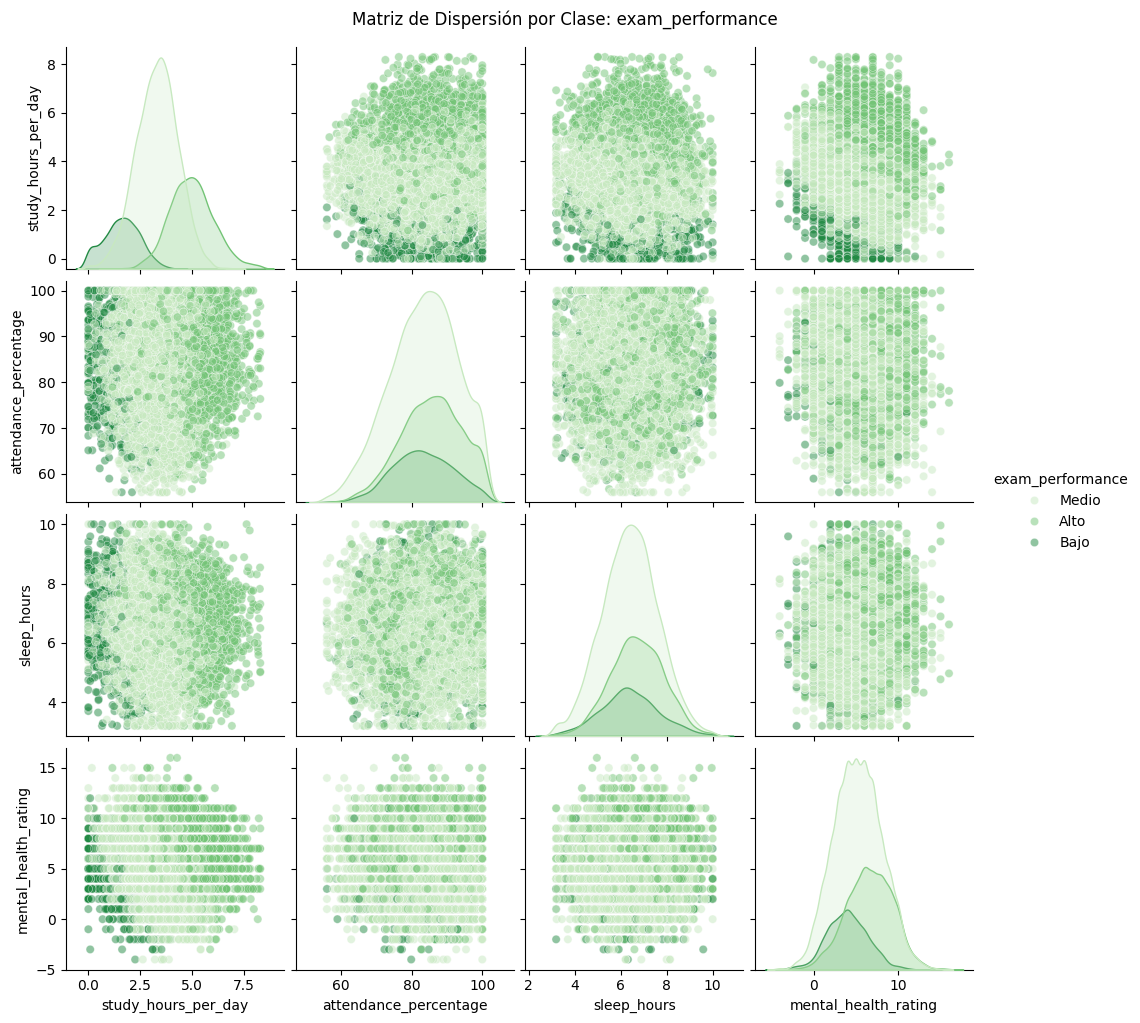

In [84]:
# Matriz de dispersi√≥n por clase
sns.pairplot(df,
             vars=["study_hours_per_day", "attendance_percentage", "sleep_hours", "mental_health_rating"],
             hue="exam_performance",
             palette="Greens",  # verde para clasificaci√≥n
             diag_kind="kde",
             plot_kws={'alpha': 0.5})
plt.suptitle("Matriz de Dispersi√≥n por Clase: exam_performance", y=1.02)
plt.show()

 **An√°lisis**

La matriz de dispersi√≥n nos permite examinar c√≥mo se distribuyen los estudiantes seg√∫n su clase de rendimiento acad√©mico (Bajo, Medio, Alto) en funci√≥n de variables num√©ricas seleccionadas.

study_hours_per_day y attendance_percentage: Se observa que los estudiantes con mejor rendimiento (clase Alto) tienden a agruparse en valores m√°s elevados de horas de estudio y porcentaje de asistencia, lo que sugiere una relaci√≥n positiva con el desempe√±o acad√©mico.

sleep_hours: Existe una ligera tendencia a que los alumnos con calificaciones m√°s altas mantengan un promedio de sue√±o m√°s estable, aunque la diferencia entre clases no es tan marcada como en otras variables.

mental_health_rating: Se percibe un patr√≥n donde los estudiantes de mayor rendimiento tienden a reportar mejores calificaciones de salud mental, aunque tambi√©n existen muchos casos de rendimiento medio con salud mental baja.



###  2.7 Limpieza y Calidad del Dataset

Durante el preprocesamiento y el an√°lisis exploratorio, se llevaron a cabo distintas tareas para asegurar la calidad y consistencia de los datos:

- **Valores nulos:**  
  Se identificaron valores faltantes en la variable `parental_education_level`, los cuales fueron imputados con la categor√≠a `"No declarado"`. Posteriormente, se confirm√≥ que no quedaron valores nulos en el dataset.

- **Valores duplicados:**  
  Se realiz√≥ una verificaci√≥n de duplicados y se comprob√≥ que no existen registros repetidos en el dataset.

- **Variables at√≠picas:**  
  Mediante boxplots (punto 2.4), se identificaron valores at√≠picos en variables como `exercise_frequency` o `mental_health_rating`. Sin embargo, no se eliminaron estos registros ya que se consideran observaciones plausibles dentro del fen√≥meno estudiado.

- **Tipos de datos y formato:**  
  Todas las columnas tienen un tipo de dato coherente con su naturaleza (num√©ricas o categ√≥ricas), y no se detectaron errores de formato o inconsistencias sem√°nticas.

>  **Conclusi√≥n:** el dataset de clasificaci√≥n se encuentra **limpio, consistente y listo para el modelado**.
